In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import fixed
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

# Plotting functions

In [18]:
# @title Plotting functions
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


def visualize_vectors(v, v_unit):
  """ Plots a 2D vector and the corresponding unit vector

  Args:
    v (ndarray): array of size (2,) with the vector coordinates
    v_unit (ndarray): array of size (2, ) with the unit vector coordinates

  """
  fig, ax = plt.subplots()

  # Set up plot aesthetics
  ax.spines['top'].set_color('none')
  ax.spines['bottom'].set_position('zero')
  ax.spines['left'].set_position('zero')
  ax.spines['right'].set_color('none')
  ax.set(xlim = [-6, 6], ylim = [-6, 6])
  ax.grid(True, alpha=.4, linewidth=1, zorder=0)

  # Plot vectors
  v_arr = ax.arrow(0, 0, v[0], v[1], width=0.08, color='#648FFF',
                   length_includes_head=True, zorder=2);
  v_unit_arr = ax.arrow(0, 0, v_unit[0], v_unit[1], width=0.08,
                        color='#DC267F',
                        length_includes_head=True, zorder=3);
  ax.set(xlim = [-4, 4], ylim = [-4, 4]);

  # Add legend
  leg = ax.legend([v_arr, v_unit_arr],
                  [r"Vector $\mathbf{v}$",
                   r"Normalized vector $\tilde{\mathbf{v}}$"],
                  handlelength=0, fontsize=20, loc='upper left')
  for handle, label in zip(leg.legendHandles, leg.texts):
    label.set_color(handle.get_facecolor())
    handle.set_visible(False)

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
      FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
      self._verts3d = xs, ys, zs

    def draw(self, renderer):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
      self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
      FancyArrowPatch.draw(self, renderer)

    def do_3d_projection(self, renderer=None):
      xs3d, ys3d, zs3d = self._verts3d
      xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
      self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))

AttributeError: 'Legend' object has no attribute 'legendHandles'

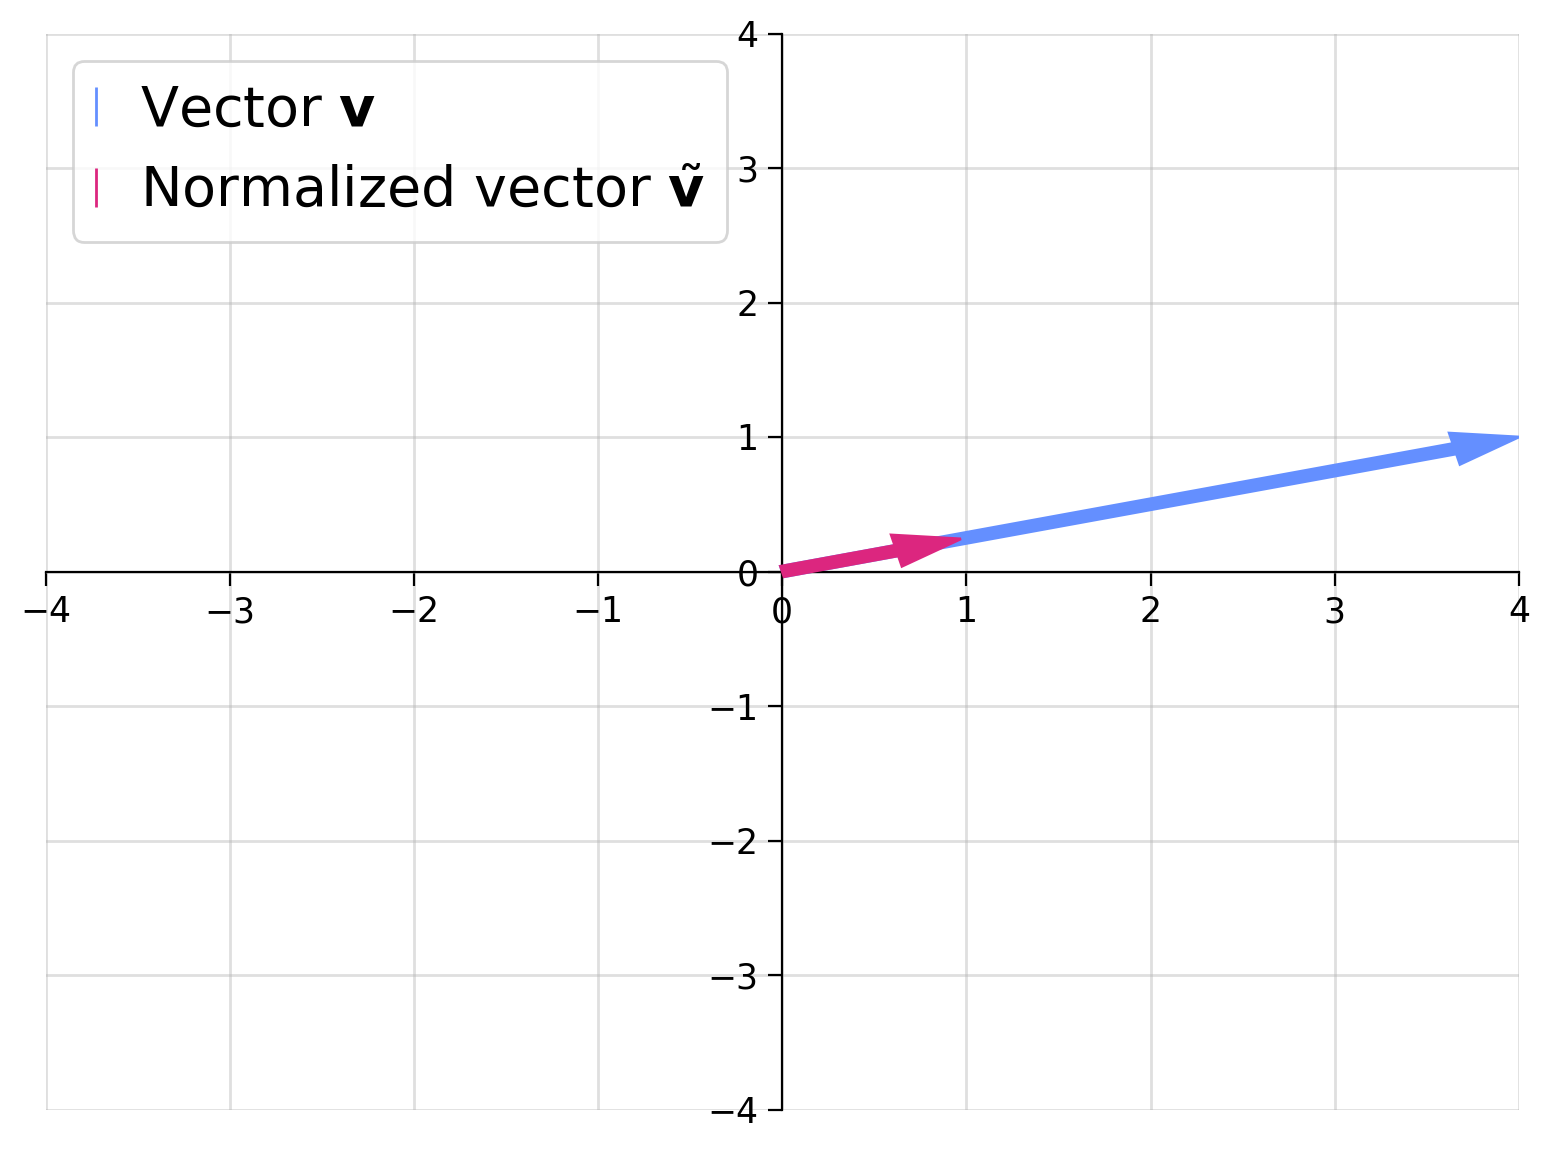

In [20]:
def normalize_vector(input_vector):
    """
    Inputs:
        input_vector (ndarray): array of shape (n_dim, ) where n_dim is the
        dimensionality of the vector
    Outputs:
        (ndarray): normalized vector of length
    :param input_vector:
    :return:
    """
    vector_length = np.linalg.norm(input_vector)
    normalized_vector = input_vector / vector_length
    return normalized_vector
v = np.array([4,1])
v_unit = normalize_vector(v)
visualize_vectors(v, v_unit)

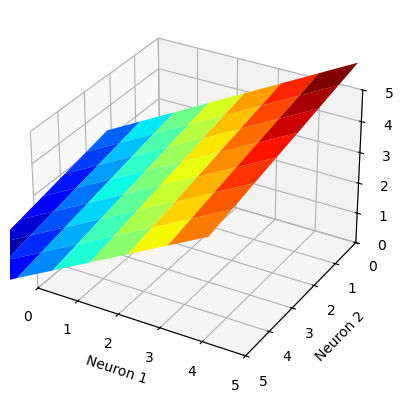

In [11]:
import matplotlib.pyplot as plt
import numpy as np
fig  = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-4,4), range(-4,4))
z = .7*xx + -.2*yy
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, cmap='jet')
ax.set(xlim = [0, 5], ylim = [5, 0], zlim = [0, 5], xlabel = 'Neuron 1', ylabel = 'Neuron 2', zlabel = 'Neuron 3')
plt.show()

In [12]:
# Suppose we have the following and want to solve the equation of matrix A-1*x = b
# r1 + 3r2 = gp1
# 2r1 + r2 = gp2
# Where gp= [16, 7]
p = np.array([[1,3], [2,1]])
g_p = np.array([16,7])
r = np.linalg.inv(p) @ g_p
print(r)

[1. 5.]


# Eigenvalues and Eigenvectors
$$ Wv = xv $$

In [13]:
# For matrix p example
print(np.linalg.eig(p))

EigResult(eigenvalues=array([ 3.44948974, -1.44948974]), eigenvectors=array([[ 0.77459667, -0.77459667],
       [ 0.63245553,  0.63245553]]))


In [16]:
# Matrix Multiplication
W = np.array([[3,2,1], [1,2,7]])
R = np.array([[0,1], [2,4], [5,1]])
G = W @ R
print(G)
print(np.matmul(W, R))
print(np.dot(W, R))
# Both produce the same answer even np.dot for square matrix

[[ 9 12]
 [39 16]]
[[ 9 12]
 [39 16]]
[[ 9 12]
 [39 16]]
